In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import platform     

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': 
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [14]:
CCTV_Seoul = pd.read_csv('C:\\Users\\user\\Desktop\\Growth Hackers Edu Sessions\\CCTV_in_Seoul.csv',encoding = 'utf-8' )
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0]:'구별'}, inplace = True)
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [15]:
pop_Seoul = pd.read_excel('C:\\Users\\user\\Desktop\\Growth Hackers Edu Sessions\\population_in_Seoul.xls', 
                          header = 2, usecols = 'B, D, G, J, N', encoding = 'utf-8')
pop_Seoul.rename(columns = {pop_Seoul.columns[0]: '구별',
                            pop_Seoul.columns[1]: '인구수',
                            pop_Seoul.columns[2]: '한국인',
                            pop_Seoul.columns[3]: '외국인',
                            pop_Seoul.columns[4]: '고령자'}, inplace = True)
pop_Seoul.drop([0], inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619


In [16]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul, on = '구별')
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.set_index('구별', inplace=True)

data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자
구별,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085
강동구,1010,166.490765,431920,427573,4347,58770
강북구,831,125.203252,322915,319164,3751,58196
강서구,911,134.793814,603611,596949,6662,79660
관악구,2109,149.290780,520040,501957,18083,72249


In [18]:
#1. 
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

data_result['외국인비율'] = data_result['외국인']/data_result['인구수']*100
data_result['고령자비율'] = data_result['고령자']/data_result['인구수']*100
data_result['오차'] = np.abs(data_result['소계']-fp1[0]*data_result['인구수']-fp1[1])
data_result.sort_values(by = '오차', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020,1566.538319
양천구,2482,34.671731,468145,464185,3960,58045,0.845892,12.398936,895.665104
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241,820.739963
용산구,2096,53.216374,245090,228999,16091,37640,6.565343,15.357624,749.085528
서초구,2297,63.371266,438163,433951,4212,54751,0.961286,12.495578,742.846867


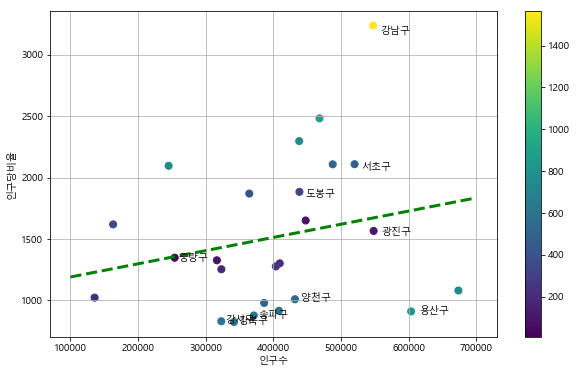

In [19]:
#2
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)


k = list(data_result['인구수'])
l = list(data_result['소계'])
m = ['강남구', '양천구', '강서구', '용산구', '서초구', '송파구', '도봉구', '중랑구', '광진구', '강북구']

plt.figure(figsize = (10,6))
colormap = data_result['오차']
plt.scatter(data_result['인구수'], data_result['소계'], c = colormap, s = 50)
plt.colorbar()
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

for i in range(10):
    plt.text(k[i]*1.02, l[i]*0.98, m[i], fontsize = 10)
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.grid()
plt.show()

#서울특별시의 구별 CCTV 총 개수는 구별 인구수와 상관관계가 낮은 것으로 드러나며, 강남구에 CCTV 개수가 압도적으로 많았다. 